<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Lytkin%20Vladimir/Netoptic_material_ae_bot_and_YOLO8_VL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –°–æ–∑–¥–∞–Ω–∏–µ –ù–° –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –æ–ø—Ä–∞–≤—ã –æ—á–∫–æ–≤ (–º–µ—Ç–∞–ª–ª –∏–ª–∏ –ø–ª–∞—Å—Ç–∏–∫)

### –ó–∞–≥—Ä—É–∑–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫


In [ ]:
# –†–∞–±–æ—Ç–∞ —Å –º–∞—Å—Å–∏–≤–∞–º–∏
import numpy as np

# –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä –∞—É–≥–º–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# –û—Å–Ω–æ–≤–∞ –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
from tensorflow.keras.models import Sequential

# –û—Å–Ω–æ–≤–Ω—ã–µ —Å–ª–æ–∏
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
from tensorflow.keras.optimizers import Adam

# –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –º–æ–¥—É–ª—è –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö –∏–∑ –æ–±–ª–∞–∫–∞
import gdown

# –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å —Ñ–∞–π–ª–∞–º–∏
import os

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª
import random

#–ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏
from PIL import Image
import matplotlib.pyplot as plt

# –†–∏—Å–æ–≤–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤ —è—á–µ–π–∫–∞—Ö Colab
%matplotlib inline

### –ó–∞–¥–∞–Ω–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏

In [ ]:
# –ó–∞–¥–∞–Ω–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

TRAIN_PATH          = '/content/frames/'       # –ü–∞–ø–∫–∞ –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö
TEST_PATH           = '/content/frames_test/'  # –ü–∞–ø–∫–∞ –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö

TEST_SPLIT          = 0.1                     # –î–æ–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –æ–±—â–µ–º –Ω–∞–±–æ—Ä–µ
VAL_SPLIT           = 0.2                    # –î–æ–ª—è –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –≤ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ

IMG_WIDTH           = 256                   # –®–∏—Ä–∏–Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –Ω–µ–π—Ä–æ—Å–µ—Ç–∏
IMG_HEIGHT          = 512                    # –í—ã—Å–æ—Ç–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –Ω–µ–π—Ä–æ—Å–µ—Ç–∏
IMG_CHANNELS        = 3                     # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–Ω–∞–ª–æ–≤ (–¥–ª—è RGB —Ä–∞–≤–Ω–æ 3, –¥–ª—è Grey —Ä–∞–≤–Ω–æ 1)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
ROTATION_RANGE      = 8                     # –ü—Ä–µ–¥–µ–ª—ã –ø–æ–≤–æ—Ä–æ—Ç–∞
WIDTH_SHIFT_RANGE   = 0.15                  # –ü—Ä–µ–¥–µ–ª—ã —Å–¥–≤–∏–≥–∞ –ø–æ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏ (float: fraction of total width, if < 1, or pixels if >= 1)
HEIGHT_SHIFT_RANGE  = 0.15                  # –ü—Ä–µ–¥–µ–ª—ã —Å–¥–≤–∏–≥–∞ –ø–æ –≤–µ—Ä—Ç–∏–∫–∞–ª–∏   (float: fraction of total height, if < 1, or pixels if >= 1
ZOOM_RANGE          = 0.15                  # –ü—Ä–µ–¥–µ–ª—ã —É–≤–µ–ª–∏—á–µ–Ω–∏—è/—É–º–µ–Ω—å—à–µ–Ω–∏—è
# BRIGHTNESS_RANGE    = (0.7, 1.3)            # –ü—Ä–µ–¥–µ–ª—ã –∏–∑–º–µ–Ω–µ–Ω–∏—è —è—Ä–∫–æ—Å—Ç–∏
HORIZONTAL_FLIP     = True                  # –ì–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–µ –æ—Ç—Ä–∞–∂–µ–Ω–∏–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–æ

EPOCHS              = 30                    # –ß–∏—Å–ª–æ —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è
BATCH_SIZE          = 50                    # –†–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ (–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ, 40 –ª—É—á—à–µ 25)
OPTIMIZER           = Adam(0.0001)         # –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä

FILE_BEST_WEIGHTS        = '/content/drive/MyDrive/data_stazhirovka1/material_best_model_w.h5'    # –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏ —Å –ª—É—á—â–∏–º val_accuracy
FILE_LAST_WEIGHTS        = '/content/drive/MyDrive/data_stazhirovka1/material_last_model_w.h5'    # –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏ –ø–æ—Å–ª–µ –æ–∫–æ–Ω—á–∞–Ω–∏—è –æ–±—É—á–µ–Ω–∏—è –Ω–∞ –≤—Å–µ—Ö —ç–ø–æ—Ö–∞—Ö

### –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å Google –¥–∏—Å–∫–∞

In [ ]:
# –ú–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ zip-–∞—Ä—Ö–∏–≤–∞ —Å GoogleDrive –Ω–∞ –¥–∏—Å–∫ –≤–∏—Ä—Ç—É–∞–ª—å–Ω–æ–π –º–∞—à–∏–Ω—ã Colab
gdown.download('https://drive.google.com/uc?id=1JyMoZOJBwTY2MI9oFFHt4Brf3Q_ULWk5', None, quiet=True)

'glass_material_no_combi.zip'

In [ ]:
# –†–∞–∑–∞—Ä—Ö–∏–≤–∞—Ü–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é 'content/frames'
# !unzip -qo "glass_material.zip" -d /content/frames
!unzip -qo "glass_material_no_combi.zip" -d /content/frames

In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–∞–≥—Ä—É–∑–∫–∏
os.listdir(TRAIN_PATH)

['–ú–µ—Ç–∞–ª–ª 418', '–ü–ª–∞—Å—Ç–∏–∫ 500']

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –∏–º–µ–Ω –∫–ª–∞—Å—Å–æ–≤
CLASS_LIST = sorted(os.listdir(TRAIN_PATH))

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–æ–≤
CLASS_COUNT = len(CLASS_LIST)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: {CLASS_COUNT}, –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤: {CLASS_LIST}')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: 2, –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤: ['–ú–µ—Ç–∞–ª–ª 418', '–ü–ª–∞—Å—Ç–∏–∫ 500']


In [ ]:
# —Å–ø–∏—Å–∫–∏ —Ñ–∞–π–ª–æ–≤ –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤ (–ø—Ä–æ–≤–µ—Ä–∫–∞)
# for cls in CLASS_LIST:
#     print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

In [ ]:
# –ü–µ—Ä–µ–Ω–æ—Å —Ñ–∞–π–ª–æ–≤ –¥–ª—è —Ç–µ—Å—Ç–∞ –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–µ –¥–µ—Ä–µ–≤–æ –ø–∞–ø–æ–∫, —Ä–∞—Å—á–µ—Ç —Ä–∞–∑–º–µ—Ä–æ–≤ –Ω–∞–±–æ—Ä–æ–≤ –¥–∞–Ω–Ω—ã—Ö

try:
  os.mkdir(TEST_PATH)                                        # –°–æ–∑–¥–∞–Ω–∏–µ –ø–∞–ø–∫–∏ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
except:
  pass

train_count = 0
test_count = 0

for class_name in CLASS_LIST:                              # –î–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤ –ø–æ –ø–æ—Ä—è–¥–∫—É –Ω–æ–º–µ—Ä–æ–≤ (–∏—Ö –º–µ—Ç–æ–∫)
    class_path = f'{TRAIN_PATH}{class_name}'              # –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ–ª–Ω–æ–≥–æ –ø—É—Ç–∏ –∫ –ø–∞–ø–∫–µ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ –∫–ª–∞—Å—Å–∞
    test_path = f'{TEST_PATH}{class_name}'                # –ü–æ–ª–Ω—ã–π –ø—É—Ç—å –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–∞
    class_files = os.listdir(class_path)                   # –ü–æ–ª—É—á–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –∏–º–µ–Ω —Ñ–∞–π–ª–æ–≤ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ —Ç–µ–∫—É—â–µ–≥–æ –∫–ª–∞—Å—Å–∞
    class_file_count = len(class_files)                    # –ü–æ–ª—É—á–µ–Ω–∏–µ –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Ñ–∞–π–ª–æ–≤ –∫–ª–∞—Å—Å–∞

    try:
      os.mkdir(test_path)                                    # –°–æ–∑–¥–∞–Ω–∏–µ –ø–æ–¥–ø–∞–ø–∫–∏ –∫–ª–∞—Å—Å–∞ –¥–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
    except:
      pass

    test_file_count = int(class_file_count * TEST_SPLIT)   # –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö —Ñ–∞–π–ª–æ–≤ –¥–ª—è –∫–ª–∞—Å—Å–∞
    test_files = class_files[-test_file_count:]            # –í—ã–¥–µ–ª–µ–Ω–∏–µ —Ñ–∞–π–ª–æ–≤ –¥–ª—è —Ç–µ—Å—Ç–∞ –æ—Ç –∫–æ–Ω—Ü–∞ —Å–ø–∏—Å–∫–∞
    for f in test_files:                                   # –ü–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ —Ç–µ—Å—Ç–æ–≤—ã—Ö —Ñ–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫—É –¥–ª—è —Ç–µ—Å—Ç–∞
        os.rename(f'{class_path}/{f}', f'{test_path}/{f}')
    train_count += class_file_count                        # –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –æ–±—â–µ–≥–æ —Å—á–µ—Ç—á–∏–∫–∞ —Ñ–∞–π–ª–æ–≤ –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞
    test_count += test_file_count                          # –£–≤–µ–ª–∏—á–µ–Ω–∏–µ –æ–±—â–µ–≥–æ —Å—á–µ—Ç—á–∏–∫–∞ —Ñ–∞–π–ª–æ–≤ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞

    print(f'–†–∞–∑–º–µ—Ä –∫–ª–∞—Å—Å–∞ {class_name}: {class_file_count} –æ–ø—Ä–∞–≤, –¥–ª—è —Ç–µ—Å—Ç–∞ –≤—ã–¥–µ–ª–µ–Ω–æ —Ñ–∞–π–ª–æ–≤: {test_file_count}')

print(f'–û–±—â–∏–π —Ä–∞–∑–º–µ—Ä –±–∞–∑—ã: {train_count}, –≤—ã–¥–µ–ª–µ–Ω–æ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è: {train_count - test_count}, –¥–ª—è —Ç–µ—Å—Ç–∞: {test_count}')

–†–∞–∑–º–µ—Ä –∫–ª–∞—Å—Å–∞ –ú–µ—Ç–∞–ª–ª 418: 418 –æ–ø—Ä–∞–≤, –¥–ª—è —Ç–µ—Å—Ç–∞ –≤—ã–¥–µ–ª–µ–Ω–æ —Ñ–∞–π–ª–æ–≤: 41
–†–∞–∑–º–µ—Ä –∫–ª–∞—Å—Å–∞ –ü–ª–∞—Å—Ç–∏–∫ 500: 499 –æ–ø—Ä–∞–≤, –¥–ª—è —Ç–µ—Å—Ç–∞ –≤—ã–¥–µ–ª–µ–Ω–æ —Ñ–∞–π–ª–æ–≤: 49
–û–±—â–∏–π —Ä–∞–∑–º–µ—Ä –±–∞–∑—ã: 917, –≤—ã–¥–µ–ª–µ–Ω–æ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è: 827, –¥–ª—è —Ç–µ—Å—Ç–∞: 90


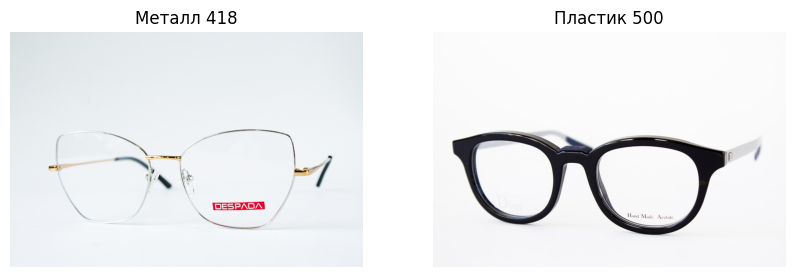

In [ ]:
# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –ø–æ –æ–¥–Ω–æ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é, –≤—ã–±—Ä–∞–Ω–Ω–æ–º—É —Å–ª—É—á–∞–π–Ω–æ, –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# –î–ª—è –≤—Å–µ—Ö –Ω–æ–º–µ—Ä–æ–≤ –∫–ª–∞—Å—Å–æ–≤:
for i in range(CLASS_COUNT):
    # –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—É—Ç–∏ –∫ –ø–∞–ø–∫–µ —Å–æ–¥–µ—Ä–∂–∏–º–æ–≥–æ –∫–ª–∞—Å—Å–∞
    frame_path = f'{TRAIN_PATH}{CLASS_LIST[i]}/'
    # –í—ã–±–æ—Ä —Å–ª—É—á–∞–π–Ω–æ–≥–æ —Ñ–æ—Ç–æ –∏–∑ i-–≥–æ –∫–ª–∞—Å—Å–∞
    img_path = frame_path + random.choice(os.listdir(frame_path))
    # –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–∏
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –≤—Å–µ–≥–æ –ø–æ–ª–æ—Ç–Ω–∞
plt.show()

### –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –≤—ã–±–æ—Ä–æ–∫

In [ ]:
# –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

# –ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –Ω–æ—Ä–º–∞–ª–∏–∑—É—é—Ç—Å—è –∏ –∞—É–≥–º–µ–Ω—Ç–∏—Ä—É—é—Ç—Å—è —Å–æ–≥–ª–∞—Å–Ω–æ –∑–∞–¥–∞–Ω–Ω—ã–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º
# –î–∞–ª–µ–µ –Ω–∞–±–æ—Ä –±—É–¥–µ—Ç —Ä–∞–∑–¥–µ–ª–µ–Ω –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω—É—é –≤—ã–±–æ—Ä–∫—É –≤ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏ VAL_SPLIT
train_datagen = ImageDataGenerator(
                    rescale=1. / 255.,                      # –ü–µ—Ä–µ—Å–∫–∞–ª–∏—Ä–æ–≤–∞–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –ø–∏–∫—Å–µ–ª–µ–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, —á—Ç–æ–±—ã –æ–Ω–∏ –Ω–∞—Ö–æ–¥–∏–ª–∏—Å—å –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 0 –¥–æ 1
                    rotation_range=ROTATION_RANGE,          # —Å–ª—É—á–∞–π–Ω—ã–µ –ø–æ–≤–æ—Ä–æ—Ç—ã –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [-RORATION_RANGE, ROTAION_RANGE] –≥—Ä–∞–¥—É—Å–æ–≤
                    width_shift_range=WIDTH_SHIFT_RANGE,    # —Å–ª—É—á–∞–π–Ω–æ–µ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–µ —Å–º–µ—â–µ–Ω–∏–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [-WIDTH_SHIFT_RANGE, WIDTH_SHIFT_RANGE] –ø–∏–∫—Å–µ–ª–µ–π
                    height_shift_range=HEIGHT_SHIFT_RANGE,  # —Å–ª—É—á–∞–π–Ω–æ–µ –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ–µ —Å–º–µ—â–µ–Ω–∏–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [-HEIGHT_SHIFT_RANGE, HEIGHT_SHIFT_RANGE] –ø–∏–∫—Å–µ–ª–µ–π
                    zoom_range=ZOOM_RANGE,                  # —Å–ª—É—á–∞–π–Ω–æ–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ ZOOM_RANGE –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö (0.2=20%)
                    horizontal_flip=HORIZONTAL_FLIP,        # –°–ª—É—á–∞–π–Ω–æ–µ –æ—Ç—Ä–∞–∂–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏ (True or False)
                    validation_split=VAL_SPLIT              # –¥–æ–ª—è –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
                )

# –ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞ —Ç–æ–ª—å–∫–æ –Ω–æ—Ä–º–∞–ª–∏–∑—É—é—Ç—Å—è
test_datagen = ImageDataGenerator(
                   rescale=1. / 255.
                )

In [ ]:
# –û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç—Å—è –∏–∑ –ø–∞–ø–∫–∏ –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞
train_generator = train_datagen.flow_from_directory(
    # –ü—É—Ç—å –∫ –æ–±—É—á–∞—é—â–∏–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º
    TRAIN_PATH,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# –ü—Ä–æ–≤–µ—Ä–æ—á–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞ —Ç–∞–∫–∂–µ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç—Å—è –∏–∑ –ø–∞–ø–∫–∏ –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

# –¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç—Å—è –∏–∑ –ø–∞–ø–∫–∏ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=test_count,
    class_mode='categorical',
    shuffle=True,
)

Found 662 images belonging to 2 classes.
Found 165 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ñ–æ—Ä–º—ã –¥–∞–Ω–Ω—ã—Ö
print(f'–§–æ—Ä–º—ã –¥–∞–Ω–Ω—ã—Ö —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {train_generator[0][0].shape}, {train_generator[0][1].shape}, –±–∞—Ç—á–µ–π: {len(train_generator)}')
print(f'–§–æ—Ä–º—ã –¥–∞–Ω–Ω—ã—Ö   –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {validation_generator[0][0].shape}, {validation_generator[0][1].shape}, –±–∞—Ç—á–µ–π: {len(validation_generator)}')
print(f'–§–æ—Ä–º—ã –¥–∞–Ω–Ω—ã—Ö      —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: {test_generator[0][0].shape}, {test_generator[0][1].shape}, –±–∞—Ç—á–µ–π: {len(test_generator)}')

print()

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤
print(f'–ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {train_generator.class_indices}')
print(f'–ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤   –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {validation_generator.class_indices}')
print(f'–ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤      —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: {test_generator.class_indices}')

–§–æ—Ä–º—ã –¥–∞–Ω–Ω—ã—Ö —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: (50, 256, 512, 3), (50, 2), –±–∞—Ç—á–µ–π: 14
–§–æ—Ä–º—ã –¥–∞–Ω–Ω—ã—Ö   –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: (50, 256, 512, 3), (50, 2), –±–∞—Ç—á–µ–π: 4
–§–æ—Ä–º—ã –¥–∞–Ω–Ω—ã—Ö      —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: (90, 256, 512, 3), (90, 2), –±–∞—Ç—á–µ–π: 1

–ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {'–ú–µ—Ç–∞–ª–ª 418': 0, '–ü–ª–∞—Å—Ç–∏–∫ 500': 1}
–ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤   –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {'–ú–µ—Ç–∞–ª–ª 418': 0, '–ü–ª–∞—Å—Ç–∏–∫ 500': 1}
–ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤      —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: {'–ú–µ—Ç–∞–ª–ª 418': 0, '–ü–ª–∞—Å—Ç–∏–∫ 500': 1}


In [ ]:
# –§—É–Ω–∫—Ü–∏—è —Ä–∏—Å–æ–≤–∞–Ω–∏—è –æ–±—Ä–∞–∑—Ü–æ–≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ –∑–∞–¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏

def show_batch(batch,                # –±–∞—Ç—á —Å –ø—Ä–∏–º–µ—Ä–∞–º–∏
               img_range=range(25),  # –¥–∏–∞–ø–∞–∑–æ–Ω –Ω–æ–º–µ—Ä–æ–≤ –∫–∞—Ä—Ç–∏–Ω–æ–∫
               figsize=(12, 4),      # —Ä–∞–∑–º–µ—Ä –ø–æ–ª–æ—Ç–Ω–∞ –¥–ª—è —Ä–∏—Å–æ–≤–∞–Ω–∏—è –æ–¥–Ω–æ–π —Å—Ç—Ä–æ–∫–∏ —Ç–∞–±–ª–∏—Ü—ã
               columns=5             # —á–∏—Å–ª–æ –∫–æ–ª–æ–Ω–æ–∫ –≤ —Ç–∞–±–ª–∏—Ü–µ
               ):

    for i in img_range:
        ix = i % columns
        if ix == 0:
            fig, ax = plt.subplots(1, columns, figsize=figsize)
        class_label = np.argmax(batch[1][i])
        ax[ix].set_title(CLASS_LIST[class_label])
        ax[ix].imshow(batch[0][i])
        ax[ix].axis('off')
        plt.tight_layout()

    plt.show()

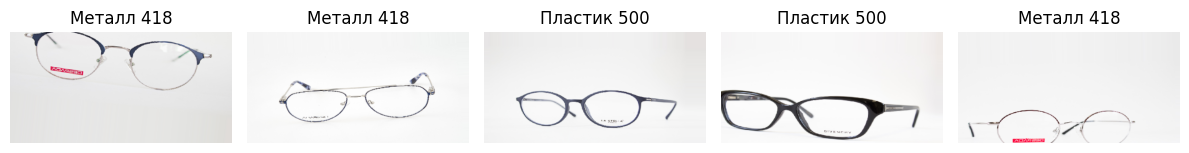

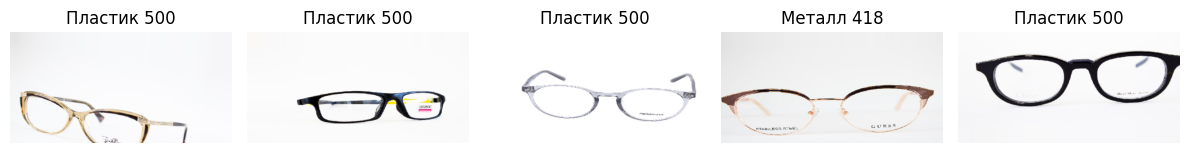

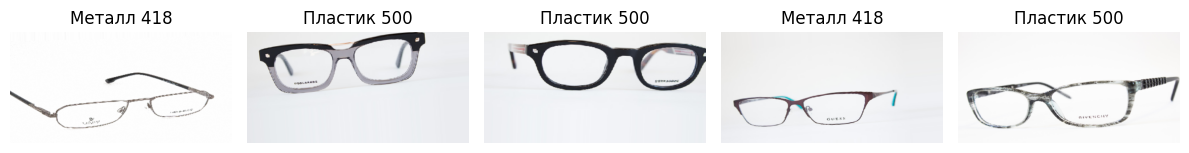

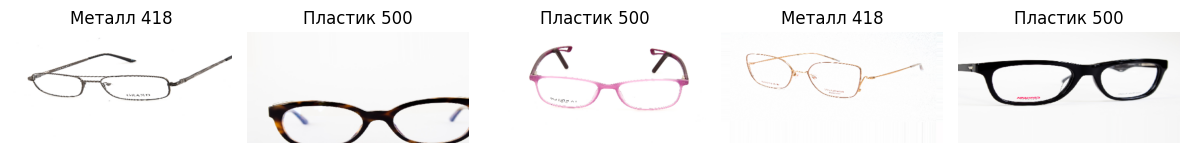

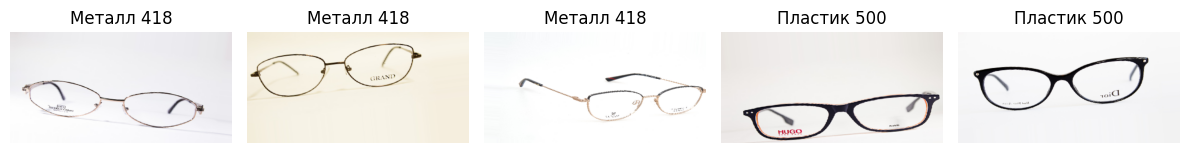

In [ ]:
# –í—ã–≤–æ–¥ –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–∑ 0-–≥–æ –±–∞—Ç—á–∞ train_generator
show_batch(train_generator[0])

### –°–æ–∑–¥–∞–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π VGG16

In [ ]:
# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π —Å–µ—Ç–∏ VGG16
from keras.applications import VGG16

# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ–±—É—á–µ–Ω–Ω—É—é –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å
model_vgg16_trained = VGG16(weights='imagenet',                         # –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö "ImageNet"
                            include_top=False,                          # –æ—Ç–∫–ª—é—á–∞–µ–º —á–∞—Å—Ç—å "–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è", –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ "—Å–≤–µ—Ä—Ç–æ—á–Ω—É—é —á–∞—Å—Ç—å"
                            input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))     # —Ä–∞–∑–º–µ—Ä —Ç–µ–Ω–∑–æ—Ä–∞ –≤—Ö–æ–¥–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

# "–ó–∞–º–æ—Ä–∞–∂–∏–≤–∞–µ–º" –≤–µ—Å–∞ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ –æ–±—É—á–µ–Ω–Ω–æ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ VGG16 (—Å–≤–µ—Ä—Ç–æ—á–Ω—É—é —á–∞—Å—Ç—å –æ–±—É—á–∞—Ç—å –Ω–µ –±—É–¥–µ–º)
model_vgg16_trained.trainable = False
model_vgg16_trained.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 256, 128)     147584    
                                                              

In [ ]:
# –°–æ–∑–¥–∞–µ–º —Å–≤–æ—é —Å–æ—Å—Ç–∞–≤–Ω—É—é —Å–µ—Ç—å –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π VGG16

model = Sequential()
# –î–æ–±–∞–≤–ª—è–µ–º –≤ –º–æ–¥–µ–ª—å —Å–µ—Ç—å VGG16 –≤–º–µ—Å—Ç–æ —Å–ª–æ—è
model.add(model_vgg16_trained)
# –ë–ª–æ–∫ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
model.add(Flatten(name='Class_1'))
model.add(Dense(256, activation='relu', name='Class_2'))
model.add(Dropout(0.3))
model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_3'))


In [ ]:
# –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ —Å–æ–∑–¥–∞–Ω–Ω–æ–π —Å–µ—Ç–∏
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 8, 512)         14714688  
                                                                 
 Class_1 (Flatten)           (None, 16384)             0         
                                                                 
 Class_2 (Dense)             (None, 256)               4194560   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 Class_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 18,909,762
Trainable params: 4,195,074
Non-trainable params: 14,714,688
_________________________________________________________________


### –ö–æ–º–ø–∏–ª—è—Ü–∏—è –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º –ª—É—á—à–∏—Ö –≤–µ—Å–æ–≤ –≤ —Ñ–∞–π–ª–µ FILE_BEST_WEIGHTS

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –∫–æ–º–ø–∏–ª—è—Ü–∏–∏ –∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º –ª—É—á—à–∏—Ö –≤–µ—Å–æ–≤ –Ω–∞ GoogleDrive
# –ü–æ –æ–∫–æ–Ω—á–∞–Ω–∏—é –≤—ã–≤–æ–¥–∏—Ç –≥—Ä–∞—Ñ–∏–∫–∏ –æ–±—É—á–µ–Ω–∏—è
from tensorflow.keras.callbacks import ModelCheckpoint

def compile_train_model(model,                  # –º–æ–¥–µ–ª—å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏
                        train_data,             # –æ–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ
                        val_data,               # –ø—Ä–æ–≤–µ—Ä–æ—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
                        optimizer=OPTIMIZER,    # –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
                        epochs=EPOCHS,          # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è
                        batch_size=BATCH_SIZE,  # —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
                        figsize=(20, 5)):       # —Ä–∞–∑–º–µ—Ä –ø–æ–ª–æ—Ç–Ω–∞ –¥–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤

    # –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])

    # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –∑–∞–¥–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    checkpoint_callback = ModelCheckpoint(filepath=FILE_BEST_WEIGHTS,
                                          save_weights_only=True,
                                          monitor='val_accuracy',
                                          save_best_only=True)
    history = model.fit(train_data,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=val_data,
                        callbacks=checkpoint_callback)                # –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç

    # –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–æ–≤ —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –æ—à–∏–±–∫–∏
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('–ì—Ä–∞—Ñ–∏–∫ –ø—Ä–æ—Ü–µ—Å—Å–∞ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏')
    ax1.plot(history.history['accuracy'],
               label='–î–æ–ª—è –≤–µ—Ä–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ')
    ax1.plot(history.history['val_accuracy'],
               label='–î–æ–ª—è –≤–µ—Ä–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
    ax1.set_ylabel('–î–æ–ª—è –≤–µ—Ä–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='–û—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ')
    ax2.plot(history.history['val_loss'],
               label='–û—à–∏–±–∫–∞ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('–≠–ø–æ—Ö–∞ –æ–±—É—á–µ–Ω–∏—è')
    ax2.set_ylabel('–û—à–∏–±–∫–∞')
    ax2.legend()
    plt.show()

Epoch 1/30
14/14 [==============================] - 77s 4s/step - loss: 1.0545 - accuracy: 0.5770 - val_loss: 0.4835 - val_accuracy: 0.7576
Epoch 2/30
14/14 [==============================] - 44s 3s/step - loss: 0.3153 - accuracy: 0.8640 - val_loss: 0.2336 - val_accuracy: 0.9394
Epoch 3/30
14/14 [==============================] - 43s 3s/step - loss: 0.1521 - accuracy: 0.9547 - val_loss: 0.1904 - val_accuracy: 0.9515
Epoch 4/30
14/14 [==============================] - 42s 3s/step - loss: 0.1103 - accuracy: 0.9773 - val_loss: 0.2240 - val_accuracy: 0.8909
Epoch 5/30
14/14 [==============================] - 42s 3s/step - loss: 0.1050 - accuracy: 0.9683 - val_loss: 0.2371 - val_accuracy: 0.8970
Epoch 6/30
14/14 [==============================] - 42s 3s/step - loss: 0.0737 - accuracy: 0.9789 - val_loss: 0.1955 - val_accuracy: 0.9091
Epoch 7/30
14/14 [==============================] - 43s 3s/step - loss: 0.0893 - accuracy: 0.9668 - val_loss: 0.1934 - val_accuracy: 0.9091
Epoch 8/30
14/14 [==

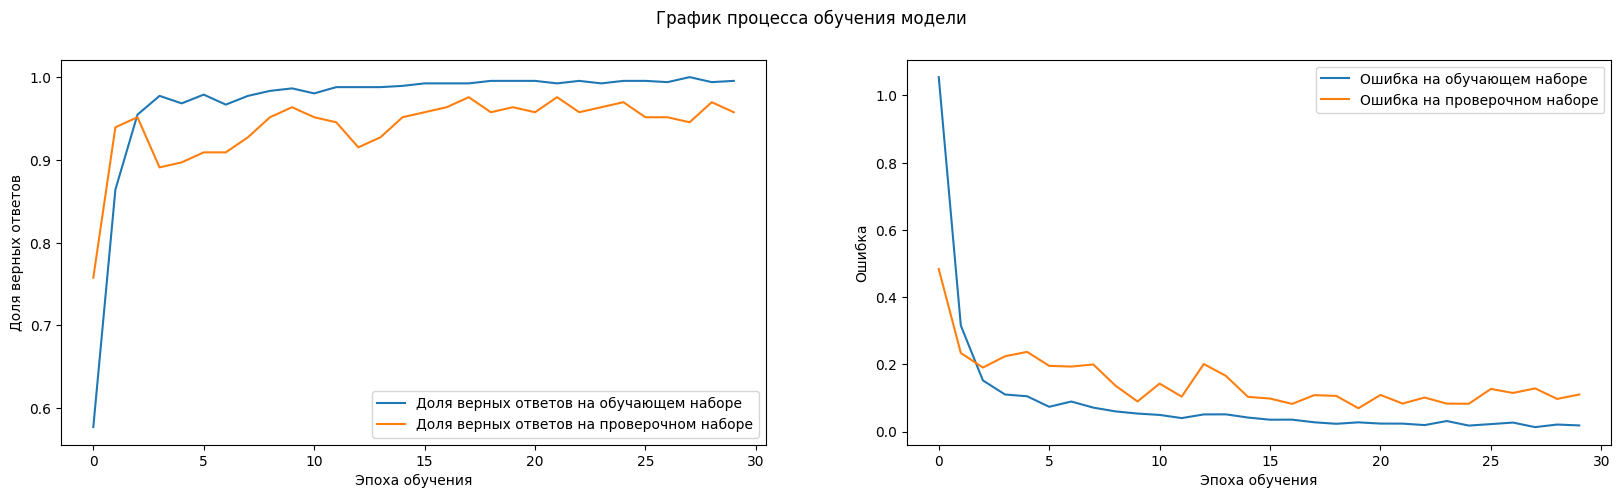

In [ ]:
# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –∑–∞–¥–∞–Ω–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö
compile_train_model(model,
                    train_generator,
                    validation_generator)

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤–µ—Å–æ–≤ –ø–æ—Å–ª–µ –æ–∫–æ–Ω—á–∞–Ω–∏—è –≤—Å–µ—Ö —ç–ø–æ—Ö –≤ —Ñ–∞–π–ª
model.save_weights(FILE_LAST_WEIGHTS)

### –ó–∞–≥—Ä—É–∑–∫–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –ª—É—á—à–∏—Ö –∏–ª–∏ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –≤–µ—Å–æ–≤ –∏–∑ –∫–∞—Ç–∞–ª–æ–≥–∞ GoogleDrive

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –ª—É—á—à–∏—Ö –≤–µ—Å–æ–≤ –∏–∑ GoogleDrive
model.load_weights(FILE_BEST_WEIGHTS)

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –≤–µ—Å–æ–≤ –∏–∑ GoogleDrive
model.load_weights(FILE_LAST_WEIGHTS)

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ: –æ—Ç—Ä–∏—Å–æ–≤–∫–∞ –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –≤—ã–≤–æ–¥–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –∑–∞–¥–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

def eval_model(model,
               x,                # –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ (–≤—Ö–æ–¥)
               y_true,           # –≤–µ—Ä–Ω—ã–µ –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤ –≤ —Ñ–æ—Ä–º–∞—Ç–µ OHE (–≤—ã—Ö–æ–¥)
               class_labels=[],  # —Å–ø–∏—Å–æ–∫ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤
               cm_round=3,       # —á–∏—Å–ª–æ –∑–Ω–∞–∫–æ–≤ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
               title='',         # –Ω–∞–∑–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
               figsize=(10, 10)  # —Ä–∞–∑–º–µ—Ä –ø–æ–ª–æ—Ç–Ω–∞ –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
               ):
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å–µ—Ç–∏
    y_pred = model.predict(x)
    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # –û–∫—Ä—É–≥–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
    cm = np.around(cm, cm_round)

    # –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'–ù–µ–π—Ä–æ—Å–µ—Ç—å {title}: –º–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–∞—è', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    ax.images[-1].colorbar.remove()       # –°—Ç–∏—Ä–∞–Ω–∏–µ –Ω–µ–Ω—É–∂–Ω–æ–π —Ü–≤–µ—Ç–æ–≤–æ–π —à–∫–∞–ª—ã
    fig.autofmt_xdate(rotation=45)        # –ù–∞–∫–ª–æ–Ω –º–µ—Ç–æ–∫ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ–π –æ—Å–∏
    plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã', fontsize=16)
    plt.ylabel('–í–µ—Ä–Ω—ã–µ –∫–ª–∞—Å—Å—ã', fontsize=16)
    plt.show()

    print('-'*100)
    print(f'–ù–µ–π—Ä–æ—Å–µ—Ç—å: {title}')

    # –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞:
    for cls in range(len(class_labels)):
        # –û–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∏–Ω–¥–µ–∫—Å –∫–ª–∞—Å—Å–∞ —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (—É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏)
        cls_pred = np.argmax(cm[cls])
        # –§–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è —Å–æ–æ–±—â–µ–Ω–∏–µ –æ –≤–µ—Ä–Ω–æ—Å—Ç–∏ –∏–ª–∏ –Ω–µ–≤–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
        msg = '–í–ï–†–ù–û :-)' if cls_pred == cls else '–ù–ï–í–ï–†–ù–û :-('
        # –í—ã–≤–æ–¥–∏—Ç—Å—è —Ç–µ–∫—Å—Ç–æ–≤–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–º –∫–ª–∞—Å—Å–µ –∏ –∑–Ω–∞—á–µ–Ω–∏–∏ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏
        print('–ö–ª–∞—Å—Å: {:<20} {:3.0f}% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # –°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
    print('\n–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è: {:3.0f}%'.format(100. * cm.diagonal().mean()))



3/3 [==============================] - 1s 327ms/step


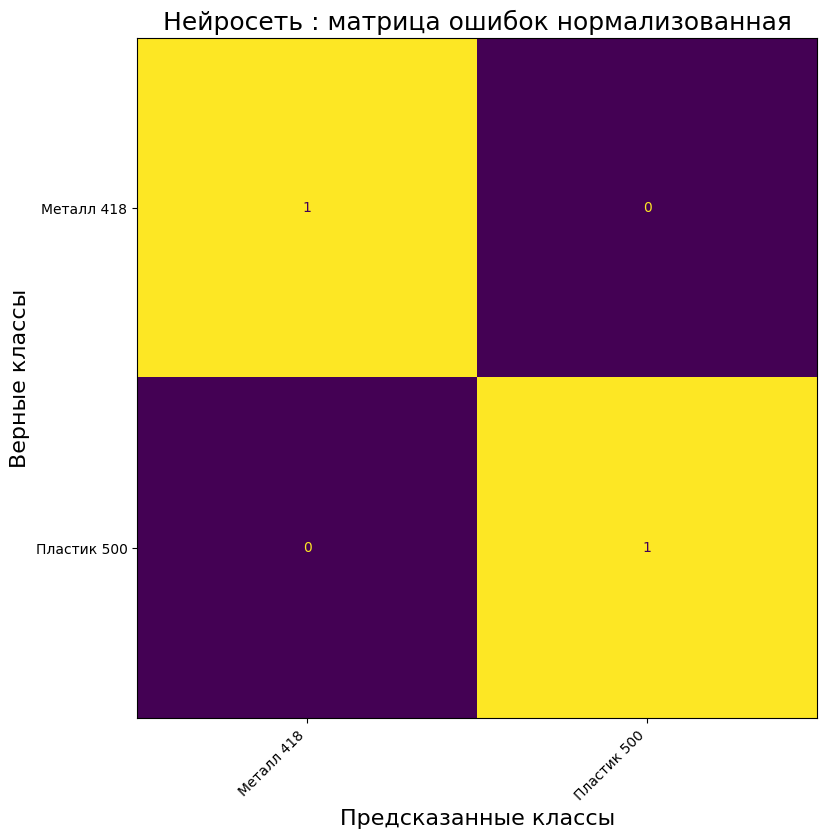

----------------------------------------------------------------------------------------------------
–ù–µ–π—Ä–æ—Å–µ—Ç—å: 
–ö–ª–∞—Å—Å: –ú–µ—Ç–∞–ª–ª 418           100% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ú–µ—Ç–∞–ª–ª 418           - –í–ï–†–ù–û :-)
–ö–ª–∞—Å—Å: –ü–ª–∞—Å—Ç–∏–∫ 500          100% —Å–µ—Ç—å –æ—Ç–Ω–µ—Å–ª–∞ –∫ –∫–ª–∞—Å—Å—É –ü–ª–∞—Å—Ç–∏–∫ 500          - –í–ï–†–ù–û :-)

–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è: 100%


In [ ]:
# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
eval_model(model, test_generator[0][0], test_generator[0][1], class_labels=CLASS_LIST)

# –ê–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –æ—á–∫–æ–≤ –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏

### –ó–∞–≥—Ä—É–∑–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
# –†–∞–±–æ—Ç–∞ —Å –æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–Ω–æ–π —Å–∏—Å—Ç–µ–º–æ–π
import os

# –†–∞–±–æ—Ç–∞ —Å –º–∞—Å—Å–∏–≤–∞–º–∏ –¥–∞–Ω–Ω—ã—Ö
import numpy as np

# –†–∞–±–æ—Ç–∞ —Å —Ç–∞–±–ª–∏—Ü–∞–º–∏
import pandas as pd

# –û—Å–Ω–æ–≤–Ω—ã–µ —Å–ª–æ–∏
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization

# –∫–ª–∞—Å—Å –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è Functional API
from tensorflow.keras import Model

# –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
from tensorflow.keras.optimizers import Adam

# –§—É–Ω–∫—Ü–∏–∏-—É—Ç–∏–ª–∏—Ç—ã
from tensorflow.keras import utils

# –ì–æ—Ç–æ–≤—ã–µ –¥–∞—Ç–∞—Å–µ—Ç—ã
from tensorflow.keras.datasets import mnist, fashion_mnist

# –ö–æ–ª–ª–±—ç–∫–∏ –¥–ª—è –≤—ã–¥–∞—á–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è
from tensorflow.keras.callbacks import LambdaCallback

# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
from tensorflow.keras.preprocessing import image

# –†–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
from sklearn.model_selection import train_test_split

# –§—É–Ω–∫—Ü–∏—è —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–æ–π –æ—à–∏–±–∫–∏ –¥–ª—è —Ä–∞—Å—á–µ—Ç–æ–≤ –≤—Ä—É—á–Ω—É—é
from sklearn.metrics import mean_squared_error

# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤
import matplotlib.pyplot as plt

# –î–ª—è —Ä–∞–±–æ—Ç—ã —Å–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏
from PIL import Image

%matplotlib inline

### –ü–∞—Ä–∞–º–µ—Ç—Ä—ã

In [ ]:
# –û–ë–£–ß–ï–ù–ò–ï –ù–ê 64—Ö128
IMG_WIDTH = 64
IMG_HEIGHT = 128
TEST_SPLIT          = 0.1                     # –î–æ–ª—è —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –æ–±—â–µ–º –Ω–∞–±–æ—Ä–µ
VAL_SPLIT           = 0.2                    # –î–æ–ª—è –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –≤ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ
FILE_BEST_MODEL = '/content/drive/MyDrive/data_stazhirovka1/autocoder_best_model_v64x128.h5'    # –º–æ–¥–µ–ª—å —Å –ª—É—á—â–∏–º val_loss
FILE_LAST_MODEL = '/content/drive/MyDrive/data_stazhirovka1/autocoder_last_model_v64x128.h5'    # –º–æ–¥–µ–ª—å –ø–æ—Å–ª–µ –æ–∫–æ–Ω—á–∞–Ω–∏—è –≤—Å–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è

### –ó–∞–≥—Ä—É–∑–∫–∞ —Ñ–∞–π–ª–æ–≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

# –º–æ–Ω—Ç–æ–≤–∞–Ω–∏–µ GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ zip-–∞—Ä—Ö–∏–≤–∞ —Å GoogleDrive –Ω–∞ –¥–∏—Å–∫ –≤–∏—Ä—Ç—É–∞–ª—å–Ω–æ–π –º–∞—à–∏–Ω—ã colab
import gdown
# gdown.download('https://drive.google.com/uc?id=1FNq2k93jLoXEp7eQslg94Rd2bdWI09cj', None, quiet=True)
gdown.download('https://drive.google.com/uc?id=1JyMoZOJBwTY2MI9oFFHt4Brf3Q_ULWk5', None, quiet=True)

'glass_material_no_combi.zip'

In [ ]:
# –†–∞–∑–∞—Ä—Ö–∏–≤–∞—Ü–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é 'content/frames'
# !unzip -qo "glass_material.zip" -d /content/frames
!unzip -qo "glass_material_no_combi.zip" -d /content/frames

# –ü–∞–ø–∫–∞ —Å –ø–∞–ø–∫–∞–º–∏ –∫–∞—Ä—Ç–∏–Ω–æ–∫, —Ä–∞—Å—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
IMAGE_PATH = '/content/frames/'

In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∑–∞–≥—Ä—É–∑–∫–∏
import os
os.listdir(IMAGE_PATH)

['–ü–ª–∞—Å—Ç–∏–∫ 500', '–ú–µ—Ç–∞–ª–ª 418']

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –∏–º–µ–Ω –∫–ª–∞—Å—Å–æ–≤
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–æ–≤
CLASS_COUNT = len(CLASS_LIST)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: {CLASS_COUNT}, –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤: {CLASS_LIST}')

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: 2, –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤: ['–ú–µ—Ç–∞–ª–ª 418', '–ü–ª–∞—Å—Ç–∏–∫ 500']


In [ ]:
# –°–æ–∑–¥–∞–Ω–∏–µ —Å–ø–∏—Å–∫–æ–≤ —Ñ–∞–π–ª–æ–≤ –∏ –∏—Ö –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–∞

data_files = []                           # C–ø–∏—Å–æ–∫ –ø—É—Ç–µ–π –∫ —Ñ–∞–π–ª–∞–º –∫–∞—Ä—Ç–∏–Ω–æ–∫
data_labels = []                          # –°–ø–∏—Å–æ–∫ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —Ñ–∞–π–ª–∞–º

for class_label in range(CLASS_COUNT):    # –î–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤ –ø–æ –ø–æ—Ä—è–¥–∫—É –Ω–æ–º–µ—Ä–æ–≤ (–∏—Ö –º–µ—Ç–æ–∫)
    class_name = CLASS_LIST[class_label]  # –í—ã–±–æ—Ä–∫–∞ –∏–º–µ–Ω–∏ –∫–ª–∞—Å—Å–∞ –∏–∑ —Å–ø–∏—Å–∫–∞ –∏–º–µ–Ω
    class_path = IMAGE_PATH + class_name  # –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–æ–ª–Ω–æ–≥–æ –ø—É—Ç–∏ –∫ –ø–∞–ø–∫–µ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ –∫–ª–∞—Å—Å–∞
    class_files = os.listdir(class_path)  # –ü–æ–ª—É—á–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –∏–º–µ–Ω —Ñ–∞–π–ª–æ–≤ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏ —Ç–µ–∫—É—â–µ–≥–æ –∫–ª–∞—Å—Å–∞
    print(f'–†–∞–∑–º–µ—Ä –∫–ª–∞—Å—Å–∞ {class_name} —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {len(class_files)} –æ–ø—Ä–∞–≤')

    # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫ –æ–±—â–µ–º—É —Å–ø–∏—Å–∫—É –≤—Å–µ—Ö —Ñ–∞–π–ª–æ–≤ –∫–ª–∞—Å—Å–∞ —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –ø—É—Ç–∏
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∫ –æ–±—â–µ–º—É —Å–ø–∏—Å–∫—É –º–µ—Ç–æ–∫ —Ç–µ–∫—É—â–µ–≥–æ –∫–ª–∞—Å—Å–∞ - –∏—Ö —Ä–æ–≤–Ω–æ —Å—Ç–æ–ª—å–∫–æ, —Å–∫–æ–ª—å–∫–æ —Ñ–∞–π–ª–æ–≤ –≤ –∫–ª–∞—Å—Å–µ
    data_labels += [class_label] * len(class_files)

print('–û–±—â–∏–π —Ä–∞–∑–º–µ—Ä –±–∞–∑—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è:', len(data_labels))

–†–∞–∑–º–µ—Ä –∫–ª–∞—Å—Å–∞ –ú–µ—Ç–∞–ª–ª 418 —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 418 –æ–ø—Ä–∞–≤
–†–∞–∑–º–µ—Ä –∫–ª–∞—Å—Å–∞ –ü–ª–∞—Å—Ç–∏–∫ 500 —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 499 –æ–ø—Ä–∞–≤
–û–±—â–∏–π —Ä–∞–∑–º–µ—Ä –±–∞–∑—ã –¥–ª—è –æ–±—É—á–µ–Ω–∏—è: 917


In [ ]:
# –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö
# –ó–∞–¥–∞–Ω–∏–µ –µ–¥–∏–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

data_images = []                          # –ü—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

for file_name in data_files:
    img = Image.open(file_name).resize((IMG_HEIGHT, IMG_WIDTH)).convert('L')   # –û—Ç–∫—Ä—ã—Ç–∏–µ –∏ —Å–º–µ–Ω–∞ —Ä–∞–∑–º–µ—Ä–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–∑ —Ü–≤–µ—Ç–Ω–æ–≥–æ (3 –∫–∞–Ω–∞–ª–∞) –≤ —Å–µ—Ä—ã–π (1 –∫–∞–Ω–∞–ª)
    img_np = np.array(img)                                        # –ü–µ—Ä–µ–≤–æ–¥ –≤ numpy-–º–∞—Å—Å–∏–≤
    data_images.append(img_np)                                    # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ –≤–∏–¥–µ numpy-–º–∞—Å—Å–∏–≤–∞ –∫ –æ–±—â–µ–º—É —Å–ø–∏—Å–∫—É

x_data = np.array(data_images)                                    # –ü–µ—Ä–µ–≤–æ–¥ –æ–±—â–µ–≥–æ —Å–ø–∏—Å–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ numpy-–º–∞—Å—Å–∏–≤
y_data = np.array(data_labels)                                    # –ü–µ—Ä–µ–≤–æ–¥ –æ–±—â–µ–≥–æ —Å–ø–∏—Å–∫–∞ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–∞ –≤ numpy-–º–∞—Å—Å–∏–≤

print(f'–í –º–∞—Å—Å–∏–≤ —Å–æ–±—Ä–∞–Ω–æ {len(data_images)} —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π —Å–ª–µ–¥—É—é—â–µ–π —Ñ–æ—Ä–º—ã: {img_np.shape}')
print(f'–û–±—â–∏–π –º–∞—Å—Å–∏–≤ –¥–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å–ª–µ–¥—É—é—â–µ–π —Ñ–æ—Ä–º—ã: {x_data.shape}')
print(f'–û–±—â–∏–π –º–∞—Å—Å–∏–≤ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤ —Å–ª–µ–¥—É—é—â–µ–π —Ñ–æ—Ä–º—ã: {y_data.shape}')

–í –º–∞—Å—Å–∏–≤ —Å–æ–±—Ä–∞–Ω–æ 917 —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π —Å–ª–µ–¥—É—é—â–µ–π —Ñ–æ—Ä–º—ã: (64, 128)
–û–±—â–∏–π –º–∞—Å—Å–∏–≤ –¥–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å–ª–µ–¥—É—é—â–µ–π —Ñ–æ—Ä–º—ã: (917, 64, 128)
–û–±—â–∏–π –º–∞—Å—Å–∏–≤ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤ —Å–ª–µ–¥—É—é—â–µ–π —Ñ–æ—Ä–º—ã: (917,)


In [ ]:
# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –≤—Å–µ—Ö –∫–∞—Ä—Ç–∏–Ω–æ–∫ –∫ –Ω—É–∂–Ω–æ–π —Ñ–æ—Ä–º–µ
x_data_ = x_data.reshape(-1, x_data.shape[1], x_data.shape[2], 1)

In [ ]:
# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –≤—Å–µ—Ö –∫–∞—Ä—Ç–∏–Ω–æ–∫ –∫ –Ω—É–∂–Ω–æ–º—É —Ç–∏–ø—É –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–∏–∫—Å–µ–ª–µ–π –≤ –¥–∏–∞–ø–∞–∑–æ–Ω [0,1]
x_data = x_data_.astype('float32') / 255.

In [ ]:
# –†–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â–∏–µ –∏ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω—ã–µ —Ü–µ–ª–µ–≤—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
x_train, x_test = train_test_split(x_data, test_size=TEST_SPLIT)

# –†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤—ã–±–æ—Ä–∫–∏
print(x_train.shape, x_test.shape, sep='\n')

(825, 64, 128, 1)
(92, 64, 128, 1)


In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ñ–æ—Ä–º—ã –¥–∞–Ω–Ω—ã—Ö
print(x_data.shape)

(917, 64, 128, 1)


###  –§—É–Ω–∫—Ü–∏—è —Å–±–æ—Ä–∫–∏ –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞

In [ ]:
# –§—É–Ω–∫—Ü–∏—è —Å–±–æ—Ä–∫–∏ —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–≥–æ –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
def create_base_ae(in_shape):
    # –≠–Ω–∫–æ–¥–µ—Ä, –≤—Ö–æ–¥ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏
    img_input = Input(in_shape)

    # –≠–Ω–∫–æ–¥–µ—Ä, –ø–µ—Ä–≤—ã–π –±–ª–æ–∫
    # 1.1. –î–≤—É–º–µ—Ä–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input)
    # 1.2. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x)
    # 1.3. –î–≤—É–º–µ—Ä–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    # 1.4. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x)
    # 1.5. –°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –∏ –æ–±–æ–±—â–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
    x = MaxPooling2D()(x)

    # –≠–Ω–∫–æ–¥–µ—Ä, –≤—Ç–æ—Ä–æ–π –±–ª–æ–∫
    # 2.1. –î–≤—É–º–µ—Ä–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    # 2.2. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x)
    # 2.3. –î–≤—É–º–µ—Ä–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    # 2.4. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x)


    # –ù–∞ –≤—ã—Ö–æ–¥–µ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –∏ –Ω–∞ –≤—Ö–æ–¥–µ –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ z - –≤–µ–∫—Ç–æ—Ä –ª–∞—Ç–µ–Ω—Ç–Ω–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞
    # 2.5. –°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –∏ –æ–±–æ–±—â–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
    z = MaxPooling2D()(x)


    # –î–µ–∫–æ–¥–µ—Ä, –ø–µ—Ä–≤—ã–π –±–ª–æ–∫
    # 1.1. –¢—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞ - –ø–æ–≤—ã—à–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z)
    # 1.2. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x)
    # 1.3. –î–≤—É–º–µ—Ä–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    # 1.4. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x)
    # 1.5. –î–≤—É–º–µ—Ä–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    # 1.6. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x)

    # –î–µ–∫–æ–¥–µ—Ä, –≤—Ç–æ—Ä–æ–π –±–ª–æ–∫
    # 2.1. –¢—Ä–∞–Ω—Å–ø–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞ - –ø–æ–≤—ã—à–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö
    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    # 2.2. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x) # —Å–ª–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
    # 2.3. –î–≤—É–º–µ—Ä–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    # 2.4. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x) # —Å–ª–æ–π –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
    # 2.5. –î–≤—É–º–µ—Ä–Ω–∞—è —Å–≤–µ—Ä—Ç–∫–∞
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    # 2.6. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    x = BatchNormalization()(x)

    # –î–µ–∫–æ–¥–µ—Ä, —Ñ–∏–Ω–∞–ª—å–Ω—ã–π —Å–ª–æ–π –¥–≤—É–º–µ—Ä–Ω–æ–π —Å–≤–µ—Ä—Ç–∫–∏, –≤—ã–¥–∞—é—â–∏–π –∏—Ç–æ–≥–æ–≤–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    outputs = Conv2D(in_shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    # –°–±–æ—Ä–∫–∞ –º–æ–¥–µ–ª–∏, –Ω–∞ –≤—Ö–æ–¥–µ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, –Ω–∞ –≤—ã—Ö–æ–¥–µ - —Å–∂–∞—Ç–æ–µ-–≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω–æ–µ
    model = Model(inputs=img_input, outputs=outputs)

    # –ö–æ–º–ø–∏–ª—è—Ü–∏—è —Å–µ—Ç–∏, –Ω–∞–∑–Ω–∞—á–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ Adam + —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    # –í–æ–∑–≤—Ä–∞—Ç –≥–æ—Ç–æ–≤–æ–π –º–æ–¥–µ–ª–∏
    return model

### –°–µ—Ä–≤–∏—Å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ –≤—ã–≤–æ–¥–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
# x_data ‚Äì –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è;
# pred ‚Äì –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–æ—Å–ª–µ –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞;
# n ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∫–∞–∂–¥–æ–≥–æ —Ç–∏–ø–∞.

def plot_images(x_data, pred, n=5):

    plt.figure(figsize=(14, 7))                     # –†–∞–∑–º–µ—Ä –ø–æ–ª–æ—Ç–Ω–∞

    for i in range(1, n + 1):                              # –ü–æ–≤—Ç–æ—Ä n —Ä–∞–∑:
        index = np.random.randint(0, pred.shape[0]) # –í—ã–±–æ—Ä —Å–ª—É—á–∞–π–Ω–æ–≥–æ –∏–Ω–¥–µ–∫—Å–∞

        # –ü–æ–∫–∞–∑ –∫–∞—Ä—Ç–∏–Ω–∫–∏ —Å –∏–Ω–¥–µ–∫—Å–æ–º index –∏–∑ –Ω–∞–±–æ—Ä–∞ x_data
        ax = plt.subplot(2, n, i)               # –ö–∞—Ä—Ç–∏–Ω–∫–∞ —Ä–∞—Å–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è –≤ –≤–µ—Ä—Ö–Ω–µ–º —Ä—è–¥—É
        plt.imshow(x_data[index].squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # –ü–æ–∫–∞–∑ –∫–∞—Ä—Ç–∏–Ω–∫–∏ —Å —Ç–µ–º –∂–µ –∏–Ω–¥–µ–∫—Å–æ–º –∏–∑ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
        ax = plt.subplot(2, n, i + n)           # –ö–∞—Ä—Ç–∏–Ω–∫–∞ —Ä–∞—Å–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è –≤ –Ω–∏–∂–Ω–µ–º —Ä—è–¥—É
        plt.imshow(pred[index].squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

### –û–±—É—á–µ–Ω–∏–µ –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ –æ—á–∫–æ–≤

In [ ]:
# –°–±–æ—Ä–∫–∞ –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –¥–ª—è —Ñ–æ—Ä–º—ã –∫–∞—Ä—Ç–∏–Ω–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞
ae_glasses = create_base_ae(x_train.shape[1:])

In [ ]:
# –°–≤–æ–¥–∫–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
ae_glasses.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 64, 128, 32)       320       
                                                                 
 batch_normalization (Batch  (None, 64, 128, 32)       128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 128, 32)       9248      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 128, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 64, 32)        0     

In [ ]:
# –í–∏–∑—É–∞–ª—å–Ω–∞—è —Å—Ö–µ–º–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –º–æ–¥–µ–ª–∏
utils.plot_model(ae_glasses,
                 dpi=70,                  # —á–∏—Å–ª–æ —Ç–æ—á–µ–∫ –Ω–∞ –¥—é–π–º (–¥—é–π–º = 2.54 —Å–º)
                 show_shapes=True         # –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –æ–∂–∏–¥–∞–µ–º—ã—Ö —Ñ–æ—Ä–º –≤—Ö–æ–¥–Ω—ã—Ö –∏ –≤—ã—Ö–æ–¥–Ω—ã—Ö —Ç–µ–Ω–∑–æ—Ä–æ–≤ –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ—è
                 )

In [ ]:
# callback –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(filepath=FILE_BEST_MODEL,
                                          save_weights_only=False,
                                          monitor='val_loss',
                                          save_best_only=True)

In [ ]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞, –Ω–∞ –≤—Ö–æ–¥–µ –∏ –≤—ã—Ö–æ–¥–µ –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ –¥–∞–Ω–Ω—ã–µ
history = ae_glasses.fit(x_train, x_train,
                        epochs=150,
                        batch_size=50,
                        validation_split=VAL_SPLIT,
                        callbacks=checkpoint_callback)

Epoch 1/150
14/14 [==============================] - 20s 215ms/step - loss: 0.2255 - val_loss: 0.1996
Epoch 2/150


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 1s 95ms/step - loss: 0.1790 - val_loss: 0.1768
Epoch 3/150
14/14 [==============================] - 1s 99ms/step - loss: 0.1446 - val_loss: 0.1469
Epoch 4/150
14/14 [==============================] - 1s 101ms/step - loss: 0.1185 - val_loss: 0.1187
Epoch 5/150
14/14 [==============================] - 1s 93ms/step - loss: 0.1006 - val_loss: 0.0963
Epoch 6/150
14/14 [==============================] - 1s 92ms/step - loss: 0.0879 - val_loss: 0.0795
Epoch 7/150
14/14 [==============================] - 1s 97ms/step - loss: 0.0782 - val_loss: 0.0676
Epoch 8/150
14/14 [==============================] - 1s 93ms/step - loss: 0.0709 - val_loss: 0.0586
Epoch 9/150
14/14 [==============================] - 1s 90ms/step - loss: 0.0650 - val_loss: 0.0515
Epoch 10/150
14/14 [==============================] - 1s 91ms/step - loss: 0.0597 - val_loss: 0.0464
Epoch 11/150
14/14 [==============================] - 1s 96ms/step - loss: 0.0552 - val_loss: 0.0419
Epoch 12/

In [ ]:
# FILE_LAST_MODEL        = '/content/drive/MyDrive/data_stazhirovka1/autocoder_last_model_v64x128.h5'
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ø–æ—Å–ª–µ –æ–∫–æ–Ω—á–∞–Ω–∏—è –≤—Å–µ—Ö —ç–ø–æ—Ö –≤ —Ñ–∞–π–ª
ae_glasses.save(FILE_LAST_MODEL)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


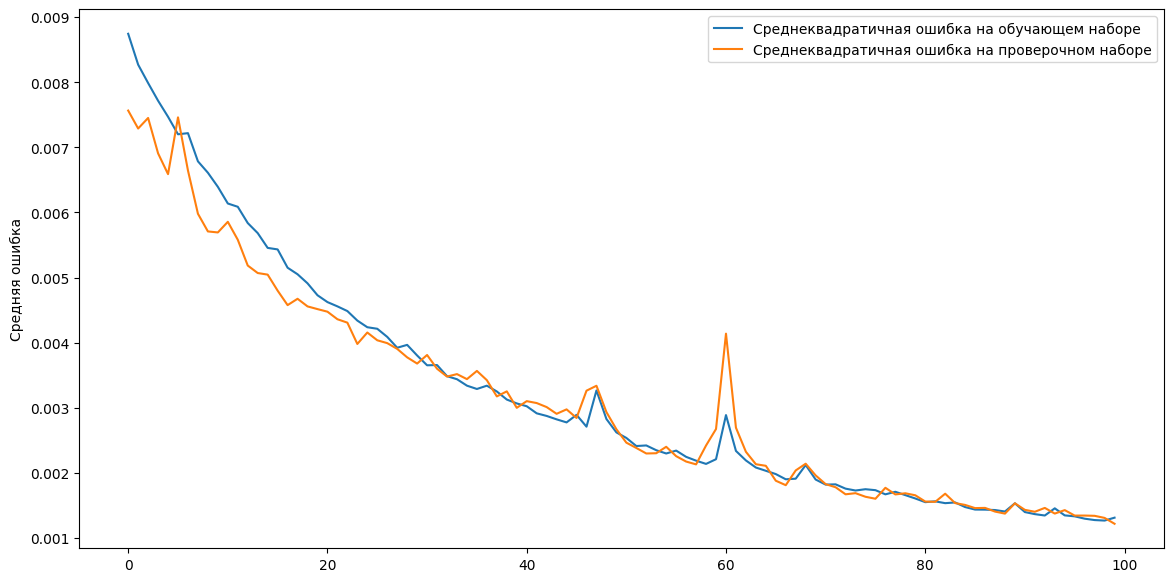

In [ ]:
# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø—Ä–æ—Ü–µ—Å—Å–∞ –æ–±—É—á–µ–Ω–∏—è
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][50:],
         label='–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ')
plt.plot(history.history['val_loss'][50:],
         label='–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –ø—Ä–æ–≤–µ—Ä–æ—á–Ω–æ–º –Ω–∞–±–æ—Ä–µ')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞')
plt.legend()
plt.show()

In [ ]:
# –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –≤—Å–µ–π –º–æ–¥–µ–ª–∏
# –ó–∞–≥—Ä—É–∑–∫–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏
from tensorflow.keras.models import load_model
ae_glasses = load_model(FILE_BEST_MODEL) # –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å

In [ ]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö
pred_train_glasses = ae_glasses.predict(x_train)
pred_test_glasses = ae_glasses.predict(x_test)

3/3 [==============================] - 0s 189ms/step


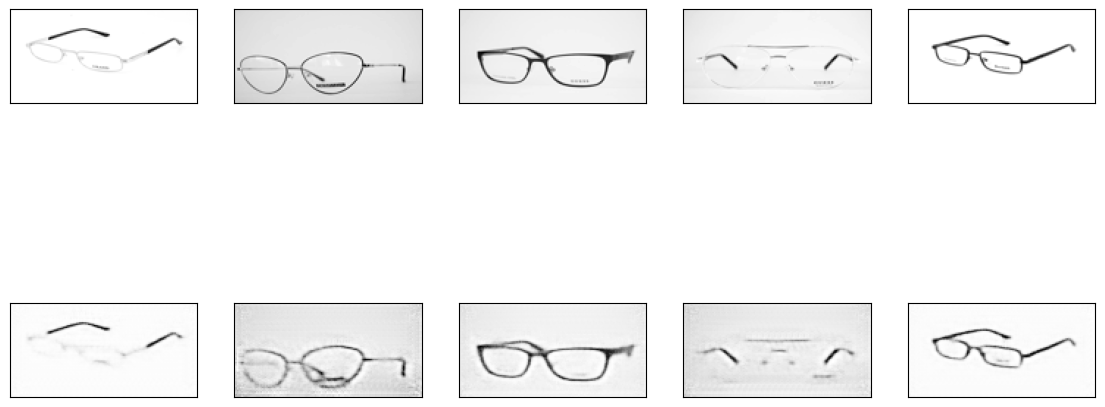

In [ ]:
# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏—Å—Ö–æ–¥–Ω—ã—Ö –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö –∫–∞—Ä—Ç–∏–Ω–æ–∫ –∏–∑ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏
plot_images(x_test, pred_test_glasses)

### –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –∏ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ

In [ ]:
# –†–∞—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–∏–∫—Å–µ–ª–µ–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
image_size = x_train.shape[1] * x_train.shape[2]

# –†–∞—Å—á–µ—Ç –º–∞—Å—Å–∏–≤–æ–≤ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–∏—Ö –æ—à–∏–±–æ–∫ –ø–æ –≤—Å–µ–º –∫–∞—Ä—Ç–∏–Ω–∫–∞–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫.
# mean_squared_error() –æ–∂–∏–¥–∞–µ—Ç –¥–≤—É–º–µ—Ä–Ω—ã–π –≤–µ–∫—Ç–æ—Ä, –¥–ª—è —á–µ–≥–æ –∫–∞–∂–¥—É—é –∫–∞—Ä—Ç–∏–Ω–∫—É –ø—Ä–∏–¥–µ—Ç—Å—è
# "—Å–ø–ª—é—â–∏—Ç—å" –¥–æ –æ–¥–Ω–æ–º–µ—Ä–Ω–æ–≥–æ –≤–µ–∫—Ç–æ—Ä–∞ —Ä–∞–∑–º–µ—Ä–∞ image_size
err_train = mean_squared_error(x_train.reshape(-1, image_size).T,
                                     pred_train_glasses.reshape(-1, image_size).T,
                                     multioutput='raw_values')
err_test  = mean_squared_error(x_test.reshape(-1, image_size).T,
                                     pred_test_glasses.reshape(-1, image_size).T,
                                     multioutput='raw_values')

# –í—ã–≤–æ–¥ —Å—Ä–µ–¥–Ω–∏—Ö –æ—à–∏–±–æ–∫
print('–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ –æ—á–∫–æ–≤: {:.5f}'.format(err_train.mean()))
print('–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –Ω–∞  —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –æ—á–∫–æ–≤: {:.5f}'.format(err_test.mean()))
print('–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ –æ—á–∫–æ–≤:  {:.5f}'.format(err_train.max()))
print('–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞  —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –æ—á–∫–æ–≤:   {:.5f}'.format(err_test.max()))

–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ –æ—á–∫–æ–≤: 0.00117
–°—Ä–µ–¥–Ω—è—è –æ—à–∏–±–∫–∞ –Ω–∞  —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –æ—á–∫–æ–≤: 0.00121
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ –æ—á–∫–æ–≤:  0.00358
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—à–∏–±–∫–∞ –Ω–∞  —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –æ—á–∫–æ–≤:   0.00342


# –ë–æ—Ç –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –æ–ø—Ä–∞–≤—ã (–≤—Å—Ç—Ä–æ–µ–Ω –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–æ–≤–∞–Ω–∏—è –µ—Å—Ç—å –ª–∏ –æ—á–∫–∏ –Ω–∞ —Ñ–æ—Ç–æ)

In [ ]:
# –ë–æ—Ç –Ω—É–∂–Ω–æ –∑–∞–ø—É—Å–∫–∞—Ç—å –≤ PyCharm –∏–ª–∏ VS Code. –í Colab –∑–∞–ø—É—Å—Ç–∏—Ç—å –Ω–µ –ø–æ–ª—É—á–∏—Ç—Å—è.

from telegram.ext import Application, CommandHandler, MessageHandler, filters
from dotenv import load_dotenv
from io import BytesIO
from PIL import Image
import numpy as np
import os
import numpy as np
from PIL import Image

IMG_WIDTH = 256
IMG_HEIGHT = 512
CLASS_COUNT = 2
IMG_WIDTH_AUTOENCODER = 64
IMG_HEIGHT_AUTOENCODER = 128
THRESHOLD_ERR = 0.01
FILE_MODEL_AUTOENCODER = 'autocoder_best_model_v64x128.h5'  # –ú–æ–¥–µ–ª—å –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –æ—á–∫–æ–≤ –Ω–∞ –∫–∞—Ä—Ç–∏–Ω–∫–µ
FILE_BEST_WEIGHTS = 'material_best_model_w.h5'      # –í–µ—Å–∞ –º–æ–¥–µ–ª–∏ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –æ–ø—Ä–∞–≤—ã


# ====== –ú–æ–¥–µ–ª—å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –æ–ø—Ä–∞–≤ –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –≤–µ—Å–æ–≤ (–±—ã–ª–∏ —Ç–æ–ª—å–∫–æ –≤–µ—Å–∞ –∏ –Ω–µ –±—ã–ª–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏)=====================================
def load_model_material():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
    from keras.applications import VGG16

    model_vgg16_trained = VGG16(weights='imagenet',
                            include_top=False,
                            input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

    model_vgg16_trained.trainable = False
    model = Sequential()
    model.add(model_vgg16_trained)
    model.add(Flatten(name='Class_1'))
    model.add(Dense(256, activation='relu', name='Class_2'))
    model.add(Dropout(0.3))
    model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_3'))

    model.load_weights(FILE_BEST_WEIGHTS)
    return model


# –ú–æ–¥–µ–ª—å –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–¥—Ö–æ–¥–∏—Ç –ª–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è (–º–æ–∂–Ω–æ –ª–∏ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –æ—á–∫–∏) –Ω–∞ –æ—Å–Ω–æ–≤–µ –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
def load_model_ae():
    from tensorflow.keras.models import load_model
    model_ae = load_model(FILE_MODEL_AUTOENCODER)
    return model_ae


# —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ –º–∞—Å—Å–∏–≤ –¥–ª—è –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
def image_to_array_ae(image):
    img_ae = Image.open(BytesIO(image)).resize((IMG_HEIGHT_AUTOENCODER, IMG_WIDTH_AUTOENCODER)).convert('L')
    data_images_ae = []
    data_images_ae.append(np.array(img_ae))
    x_data_ae = np.array(data_images_ae)
    x_data_ae_ = x_data_ae.reshape(-1, x_data_ae.shape[1], x_data_ae.shape[2], 1)
    x_data_ae = x_data_ae_.astype('float32') / 255.
    return x_data_ae


# —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ –º–∞—Å—Å–∏–≤ –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –æ–ø—Ä–∞–≤—ã
def image_to_array_material(image):
    img = Image.open(BytesIO(image)).resize((IMG_HEIGHT, IMG_WIDTH))
    data_images = []
    data_images.append(np.array(img))
    x_data = np.array(data_images)
    return x_data


# –§—É–Ω–∫—Ü–∏—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—á–∫–∏ –∏–ª–∏ –Ω–µ—Ç –ø–æ –ø–æ—Ä–æ–≥—É —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–æ–π –æ—à–∏–±–∫–∏
def img_error(x_data, pred):
    from sklearn.metrics import mean_squared_error
    image_size = x_data.shape[1] * x_data.shape[2]  # –†–∞—Å—á–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–∏–∫—Å–µ–ª–µ–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    err_pred = mean_squared_error(x_data.reshape(-1, image_size).T,
                                     pred.reshape(-1, image_size).T,
                                     multioutput='raw_values')
    return err_pred.mean()


model_ae = load_model_ae()
model_material = load_model_material()


#====== –ó–∞–ø—É—Å–∫ –±–æ—Ç–∞ =======================================================================================
# –≤–æ–∑—å–º–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –æ–∫—Ä—É–∂–µ–Ω–∏—è –∏–∑ .env
load_dotenv()

# –∑–∞–≥—Ä—É–∂–∞–µ–º —Ç–æ–∫–µ–Ω –±–æ—Ç–∞
TOKEN = os.environ.get("TOKEN")

# —Ñ—É–Ω–∫—Ü–∏—è –∫–æ–º–∞–Ω–¥—ã /start
async def start(update, context):
    await update.message.reply_text('–ü—Ä–∏–≤–µ—Ç! –û—Ç–ø—Ä–∞–≤—å —ç—Ç–æ–º—É –±–æ—Ç—É —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—é –æ–ø—Ä–∞–≤—ã –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è –º–∞—Ç–µ—Ä–∏–∞–ª–∞.')


# —Ñ—É–Ω–∫—Ü–∏—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
async def material(update, context):
    await update.message.reply_text('–ú—ã –ø–æ–ª—É—á–∏–ª–∏ –æ—Ç —Ç–µ–±—è —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—é. –ò–¥–µ—Ç —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞...')

    file = await update.message.document.get_file()
    # –∏–∑–≤–ª–µ–∫–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç–µ bytearray
    file = await update.message.document.get_file()
    image = await file.download_as_bytearray()

    x_data_ae = image_to_array_ae(image)
    pred_ae = model_ae.predict(x_data_ae)                   # –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –æ—á–∫–∏ –∏–ª–∏ –Ω–µ—Ç –Ω–∞ –∫–∞—Ä—Ç–∏–Ω–∫–µ
    error_in_glass_definition = img_error(x_data_ae, pred_ae)
    print("–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞=", error_in_glass_definition)
    if error_in_glass_definition > THRESHOLD_ERR:
        await update.message.reply_text("–û—á–∫–∏ –Ω–∞ —Ñ–æ—Ç–æ –Ω–µ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω—ã. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –¥—Ä—É–≥—É—é —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—é")
    else:
        x_data = image_to_array_material(image)
        pred_material = model_material.predict(x_data)      # –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –æ—á–∫–æ–≤
        if np.argmax(pred_material) == 0:
            frame_material = "–û–ø—Ä–∞–≤–∞ –º–µ—Ç–∞–ª–ª–∏—á–µ—Å–∫–∞—è"
        else:
            frame_material = "–û–ø—Ä–∞–≤–∞ –ø–ª–∞—Å—Ç–∏–∫–æ–≤–∞—è"

        # –≤–æ–∑–≤—Ä–∞—â–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –æ–±—Ä–∞—Ç–Ω–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é
        await update.message.reply_text(frame_material)


def main():
    # —Ç–æ—á–∫–∞ –≤—Ö–æ–¥–∞ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ
    application = Application.builder().token(TOKEN).build()
    print('–ë–æ—Ç –∑–∞–ø—É—â–µ–Ω...')

    # –¥–æ–±–∞–≤–ª—è–µ–º –æ–±—Ä–∞–±–æ—Ç—á–∏–∫ –∫–æ–º–∞–Ω–¥—ã /start
    application.add_handler(CommandHandler("start", start))

    # –¥–æ–±–∞–≤–ª—è–µ–º –æ–±—Ä–∞–±–æ—Ç—á–∏–∫ —Ñ–æ—Ç–æ
    application.add_handler(MessageHandler(filters.Document.IMAGE, material))

    # –∑–∞–ø—É—Å–∫ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è (–¥–ª—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∏ –Ω—É–∂–Ω–æ –Ω–∞–∂–∞—Ç—å Ctrl-C)
    application.run_polling()


if __name__ == "__main__":
    main()

# –ú–æ–¥–µ–ª—å –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è —Ä–∞–º–æ–∫ —Å —Ç–µ–∫—Å—Ç–æ–º –Ω–∞ –æ—Å–Ω–æ–≤–µ YOLO8

## –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –ø–∞–∫–µ—Ç–æ–≤ –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
%pip install ultralytics          # –¥–ª—è –æ–±—É—á–µ–Ω–∏—è YOLOv8 custom
%pip install python-Levenshtein   # –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è —Å–æ–ø–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è —Å—Ç—Ä–æ–∫
%pip install fuzzywuzzy           # –¥–ª—è –Ω–µ—á—ë—Ç–∫–æ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å—Ç—Ä–æ–∫

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract          # –¥–ª—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–∞ –≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,171 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import pytesseract
from fuzzywuzzy import process
from matplotlib import pyplot as plt
from PIL import Image
import os
import numpy as np
import pandas as pd
import glob

Ultralytics YOLOv8.0.164 üöÄ Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
PATH_DATASET = '/content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/'
PATH_DATASET_YAML = PATH_DATASET + 'glasses_v8.yaml'

# –ú–æ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd $PATH_DATASET


/content/drive/MyDrive/uai/st1/glasses_dataset_yolo8


In [ ]:
!ls $PATH_DATASET

glasses_v8.yaml		       train			       yolov8n.pt
runs			       train-20230817T205601Z-001.zip  –ê—Ç—Ä–∏–±—É—Ç—ã_3.xlsx
test			       valid
test-20230817T205830Z-001.zip  valid-20230817T205818Z-001.zip


In [ ]:
!cat $PATH_DATASET_YAML

path: /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/
train: train/images
val: valid/images

names:
  0: arm_tag


## –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ 'yolov8n.pt' –∏ –æ–±—É—á–µ–Ω–∏–µ

In [ ]:
# Load the model.
model = YOLO('yolov8n.pt')

# Training.
results = model.train(
   data=PATH_DATASET_YAML,
   imgsz=640,
   epochs=50,
   batch=10)
#   name='yolov8n_train')
# model.val()

Ultralytics YOLOv8.0.163 üöÄ Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/glasses_v8.yaml, epochs=50, patience=50, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a53641695a0>
fitness: 0.6649549313214983
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.63061])
names: {0: 'arm_tag'}
plot: True
results_dict: {'metrics/precision(B)': 0.9934927205347441, 'metrics/recall(B)': 0.9444444444444444, 'metrics/mAP50(B)': 0.9740322580645162, 'metrics/mAP50-95(B)': 0.6306130061278296, 'fitness': 0.6649549313214983}
save_dir: PosixPath('runs/detect/val3')
speed: {'preprocess': 2.603292465209961, 'inference': 21.57757017347548, 'loss': 0.002463658650716146, 'postprocess': 9.932888878716362}

## –í–∞–ª–∏–¥–∞—Ü–∏—è –º–æ–¥–µ–ª–∏

In [ ]:
# –í–∞–ª–∏–¥–∞—Ü–∏—è –º–æ–¥–µ–ª–∏
MODEL_PATH = PATH_DATASET + 'runs/detect/train2/weights/best.pt'
model = YOLO(MODEL_PATH)  # Load the custom model

# Validate the model
metrics = model.val()
print('map50-95', metrics.box.map)
print('map50', metrics.box.map50)
print('map75', metrics.box.map75)

Ultralytics YOLOv8.0.163 üöÄ Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:01<00:00,  1.67it/s]
                   all         18         18      0.993      0.944      0.974      0.631
Speed: 2.5ms preprocess, 28.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val4


map50-95 0.6306130061278296
map50 0.9740322580645162
map75 0.7586790699110911


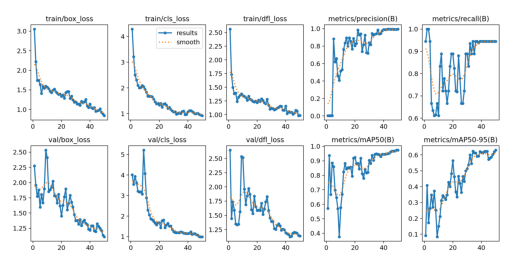

In [ ]:
# –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è
TRAIN_RESULTS_PICTURE = PATH_DATASET + 'runs/detect/train2/results.png'
plt.imshow(Image.open(TRAIN_RESULTS_PICTURE))
plt.axis('off')
plt.show()


## –ó–∞–ø—É—Å–∫ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

In [ ]:
PATH_DATASET = '/content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/'
MODEL_PATH = PATH_DATASET + 'runs/detect/train2/weights/best.pt'
TEST_FILES = PATH_DATASET + 'test/'
PATH_PREDICT = PATH_DATASET + 'runs/detect/predict_yolov8n_50epochs/'

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ –∏ –ø–æ–ª—É—á–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
model = YOLO(MODEL_PATH)
results = model(TEST_FILES, imgsz=640, show_labels=True, max_det=1, save=True, name=PATH_PREDICT)



image 1/4 /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/test/10.jpg: 640x480 1 arm_tag, 6.9ms
image 2/4 /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/test/13.jpg: 640x480 1 arm_tag, 16.0ms
image 3/4 /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/test/22.jpg: 640x480 1 arm_tag, 6.5ms
image 4/4 /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/test/test.jpg: 640x480 1 arm_tag, 6.6ms
Speed: 3.2ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/drive/MyDrive/uai/st1/glasses_dataset_yolo8/runs/detect/predict_yolov8n_50epochs


## –û—Ç—Ä–∏—Å–æ–≤–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∏ –æ–±—Ä–µ–∑–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

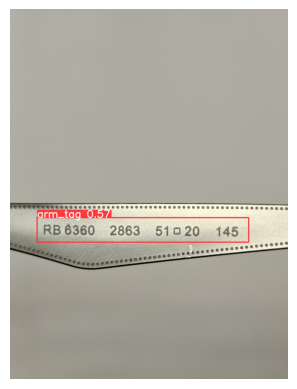

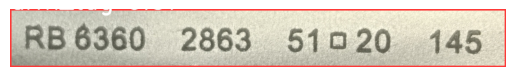

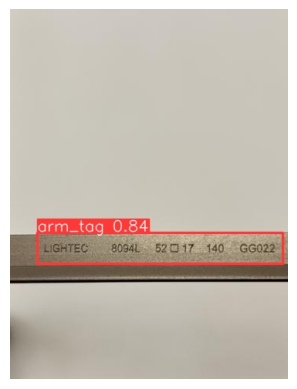

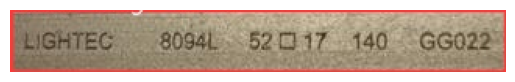

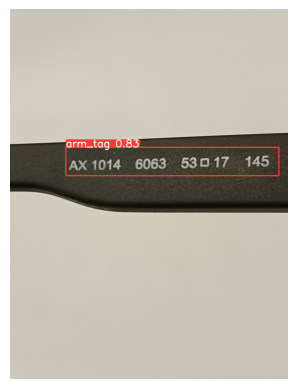

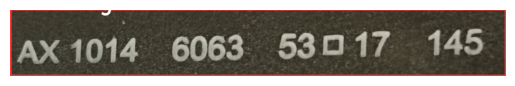

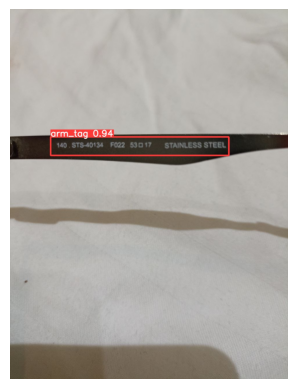

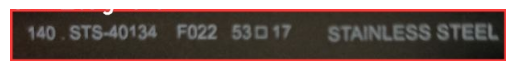

In [ ]:
from pathlib import Path
%matplotlib inline

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏  –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
def display_img(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()


# –û—Ç—Ä–∏—Å–æ–≤–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –Ω–∞ –ø–æ–ª–Ω–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏, –æ–±—Ä–µ–∑–∫–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –æ–±—Ä–µ–∑–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
predicted_images = glob.glob(PATH_PREDICT + '*.jpg')

img_num = 0
for img in predicted_images:
  img_to_show = Image.open(img)
  display_img(img_to_show)
  x_min, y_min, x_max, y_max = results[img_num].boxes.data[0][:4]
  cropped_img = img_to_show.crop((int(x_min), int(y_min), int(x_max), int(y_max)))
  display_img(cropped_img)
  path = Path(img)
  cropped_name = PATH_PREDICT + 'cropped_' + path.name
  cropped_img.save(cropped_name)
  img_num+= 1

## –ß—Ç–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –∏–∑ —Ä–∞–º–æ–∫ –∏ –ø–æ–∏—Å–∫ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ –≤ —Ç–∞–±–ª–∏—Ü–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –∑–∞–≥—Ä—É–∑–∫–∏ —Ñ–∞–π–ª–∞ —Å –∞—Ç—Ä–∏–±—É—Ç–∞–º–∏ –æ–ø—Ä–∞–≤ –∏ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ–º —Å–ø–∏—Å–∫–∞ –∞—Ç—Ä–∏–±—É—Ç–æ–≤
def frames_attr():
  ATTR_FRAMES_FILE = PATH_DATASET + '–ê—Ç—Ä–∏–±—É—Ç—ã_3.xlsx'
  excel_attr = pd.read_excel(ATTR_FRAMES_FILE, names=['Num', 'empty', 'Attr_full','Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5'], index_col=0)
  df = pd.DataFrame(excel_attr)
  df = df.dropna(subset=['Attr_full'])
  attr_list = df['Attr_full'].tolist()
  attr_list_cleaned = ["".join(s.split()) for s in attr_list]
  return attr_list_cleaned

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏  –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
def display_img(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

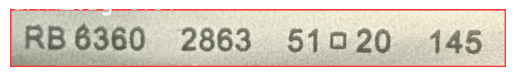

–†–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç:  RB6360 2863 51020 145
–¢–µ–∫—Å—Ç –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤ —Å–ø–∏—Å–∫–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤: RB6360286351020145
–í —Ç–∞–±–ª–∏—Ü–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤ –ø–æ–¥ –ø–æ—Ä—è–¥–∫–æ–≤—ã–º –Ω–æ–º–µ—Ä–æ–º  10  –Ω–∞–π–¥–µ–Ω —Ç–µ–∫—Å—Ç:  RB6360286351*20145   –ò–Ω–¥–µ–∫—Å —Å—Ö–æ–¥—Å—Ç–≤–∞ 94


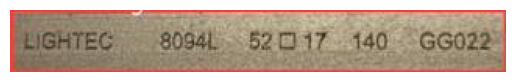

–†–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç:  ‚ÄúLGH $094L 52017 140 - GGO22
–¢–µ–∫—Å—Ç –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤ —Å–ø–∏—Å–∫–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤: ‚ÄúLGH$094L52017140-GGO22
–í —Ç–∞–±–ª–∏—Ü–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤ –ø–æ–¥ –ø–æ—Ä—è–¥–∫–æ–≤—ã–º –Ω–æ–º–µ—Ä–æ–º  13  –Ω–∞–π–¥–µ–Ω —Ç–µ–∫—Å—Ç:  LIGHTEC8094L52*17140GG022   –ò–Ω–¥–µ–∫—Å —Å—Ö–æ–¥—Å—Ç–≤–∞ 77


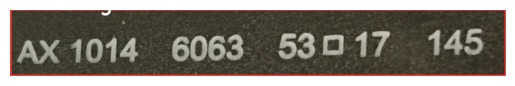

–†–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç:  AX 1014 6063 53017 145
–¢–µ–∫—Å—Ç –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤ —Å–ø–∏—Å–∫–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤: AX1014606353017145
–í —Ç–∞–±–ª–∏—Ü–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤ –ø–æ–¥ –ø–æ—Ä—è–¥–∫–æ–≤—ã–º –Ω–æ–º–µ—Ä–æ–º  22  –Ω–∞–π–¥–µ–Ω —Ç–µ–∫—Å—Ç:  AX1014606353*17145   –ò–Ω–¥–µ–∫—Å —Å—Ö–æ–¥—Å—Ç–≤–∞ 94


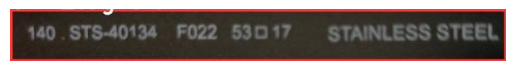

–†–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç:  140 .STS-40134 F022 53017 STAINLESS STEEL
–¢–µ–∫—Å—Ç –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤ —Å–ø–∏—Å–∫–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤: 140.STS-40134F02253017STAINLESSSTEEL
–í —Ç–∞–±–ª–∏—Ü–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤ –ø–æ–¥ –ø–æ—Ä—è–¥–∫–æ–≤—ã–º –Ω–æ–º–µ—Ä–æ–º  67  –Ω–∞–π–¥–µ–Ω —Ç–µ–∫—Å—Ç:  WE514505250*18140   –ò–Ω–¥–µ–∫—Å —Å—Ö–æ–¥—Å—Ç–≤–∞ 50


In [ ]:
# –†–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –∏ –ø–æ–∏—Å–∫ –Ω–∞–∏–ª—É—á—à–µ–≥–æ —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è –∏–∑ —Å–ø–∏—Å–∫–∞
PATH_PREDICT = PATH_DATASET + 'runs/detect/predict_yolov8n_50epochs/'

attributes_cleaned = frames_attr()

images_for_extraction = glob.glob(PATH_PREDICT + 'cropped*.jpg')

for img in images_for_extraction:
  img_to_show = Image.open(img)
  display_img(img_to_show)
#  print('size=', img_to_show.size)

  if img_to_show.size[0] > 1000:
    img_to_show = img_to_show.resize((600, 68))
  if img_to_show.size[0] < 400:
    img_to_show = img_to_show.resize((400, 42))

  extracted_text = pytesseract.image_to_string(img_to_show).strip()
  print('–†–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç: ', extracted_text)

  text_cleaned = "".join(extracted_text.split())
  a = process.extractOne(text_cleaned, attributes_cleaned)  # –Ω–∞—Ö–æ–¥–∏—Ç —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ —Å –ª—É—á—à–∏–º –∏–Ω–¥–µ–∫—Å–æ–º —Å—Ö–æ–¥—Å—Ç–≤–∞ –≤ —Å–ø–∏—Å–∫–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤
  row_num = attributes_cleaned.index(a[0])

  print('–¢–µ–∫—Å—Ç –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤ —Å–ø–∏—Å–∫–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤:', text_cleaned)
  print('–í —Ç–∞–±–ª–∏—Ü–µ –∞—Ç—Ä–∏–±—É—Ç–æ–≤ –ø–æ–¥ –ø–æ—Ä—è–¥–∫–æ–≤—ã–º –Ω–æ–º–µ—Ä–æ–º ', row_num+1, ' –Ω–∞–π–¥–µ–Ω —Ç–µ–∫—Å—Ç: ',a[0], ' ', '–ò–Ω–¥–µ–∫—Å —Å—Ö–æ–¥—Å—Ç–≤–∞', a[1])
  print('='*30)


  # imgcv2 = cv2.imread(img)
  # gray = cv2.cvtColor(imgcv2, cv2.COLOR_BGR2GRAY)
  # display_img(gray)
  # print('size=', gray.size)
  # extracted_text = pytesseract.image_to_string(gray)
  # print(extracted_text)
